In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

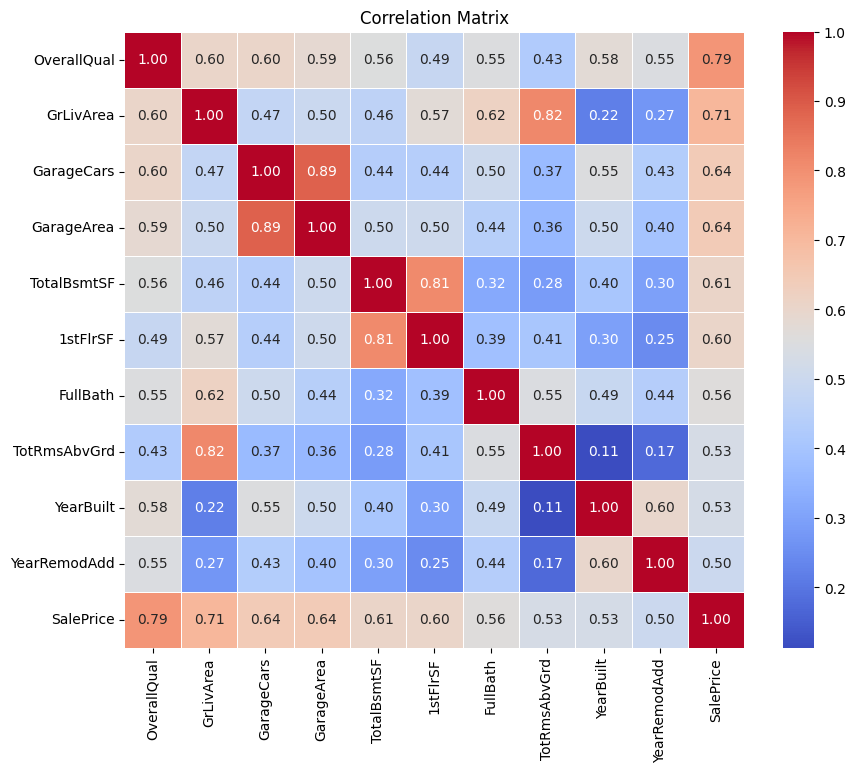

In [116]:
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv('test.csv')
# Compute correlation matrix
corr_matrix = X_train.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [117]:
def gradient_descent(X, Y, alpha, epochs, theta):

    m=len(Y)
    errors = list()
    for i in range(epochs):
        #Calculating predictions:
        predictions = X.dot(theta)
        #Calculating MSE for these predictions:
        err = (1/m) * np.sum((predictions - Y) ** 2) 
        errors.append(err)

        #Calculating the gradient of the cost function:
        gradient = (2/m) * X.T.dot(X.dot(theta) - Y)

        theta -= gradient * alpha

    return theta.copy(), errors

In [118]:
def ridge_gradient_descent(X, Y, alpha, epochs, theta, lambda_, decay=0.001):
    m = len(Y)
    errors = []

    for epoch in range(epochs):
        predictions = X.dot(theta)
        
        # Compute Mean Squared Error
        error = (1 / m) * np.sum((predictions - Y) ** 2)
        errors.append(error)
        
        # Compute Gradient (with Ridge regularization)
        gradient = (1 / m) * X.T.dot(predictions - Y) + (lambda_ * theta)
        
        # Update Weights
        theta -= alpha * gradient

    return theta.copy(), errors


In [119]:
def calc_r2(predictions, Y):
    tss = np.sum((Y - np.mean(Y)) ** 2)
    ess = np.sum((Y - predictions) ** 2)
    r2= 1 - (ess / tss)
    return r2

In [120]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_train = standardize(X_train)

In [121]:
#Implementing batch normalisation: 

def batch_normalisation(dataframe):
    cnt=0
    r2list = list()
    paramlist = list()
    while(cnt<dataframe.shape[0]):
        minibatch = dataframe[cnt:cnt+50]
        #print(minibatch)
        X = minibatch.drop('OverallQual', axis=1).values
        Y = minibatch['OverallQual'].values
        cnt+= 50
        # Now we have to standardise X:
        X = (X - X.mean(axis=0)) / X.std(axis=0)

        # Adding a column of ones at the start for intercept:
        one_col = np.ones((X.shape[0],1))
        X = np.hstack((one_col, X))
        theta = np.zeros(X.shape[1])

        alpha = 0.1
        epochs = 5000
        lambda_ = 0.05

        # Calling gradient descent function for this minibatch:
        thet, errs = ridge_gradient_descent(X, Y, alpha, epochs, theta,lambda_)
        paramlist.append(thet)
        predictions = X.dot(thet)
        x = calc_r2(predictions, Y)
        r2list.append(x)
    plt.plot(r2list)
    print(max(r2list))
    maxindex = 0
    for i in range(len(r2list)):
        if r2list[i] == max(r2list):
            maxindex = i
    bestparams = paramlist[maxindex] #replace this with maxindex after testing
    return bestparams

0.8830886451984079


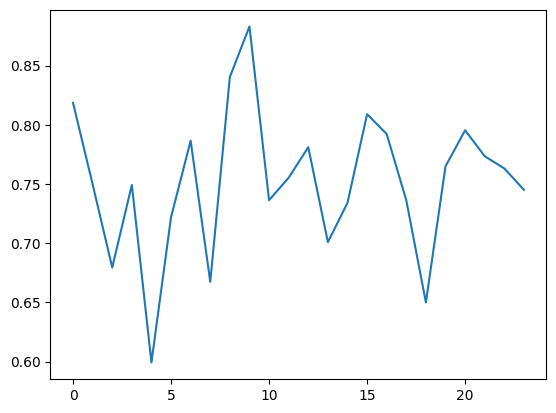

In [122]:
X_train = X_train.drop(columns = ['GarageCars'])
weights = batch_normalisation(X_train)
weights = np.array(weights)

In [123]:
print(weights.shape)
print(weights)

(10,)
[-0.04565261  0.29024343  0.07765559  0.35989298 -0.13917153  0.02588021
  0.01475765  0.26752689  0.21439717  0.10794448]


In [124]:
X_test = X_test.drop(columns = ['GarageCars'])
X_test = standardize(X_test)
xnew = X_test.drop('OverallQual', axis=1).values
ynew = X_test['OverallQual'].values
ynew = standardize(ynew)

ones_column = np.ones((xnew.shape[0], 1))
xnew = np.hstack((ones_column, xnew))

predictnew = xnew.dot(weights)
print(xnew.shape)
print(calc_r2(predictnew, ynew))

(292, 10)
0.5889074863176522
